[심박 기본 가정](https://www.forbes.com/health/wellness/normal-heart-rate-by-age/)  
[미국 심장 협회](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates)  
[블로그](https://dpreviewplus.tistory.com/entry/%EC%A0%95%EC%83%81-%EC%8B%AC%EB%B0%95%EC%88%98%EC%99%80-%EC%9A%B4%EB%8F%99%ED%95%A0%EB%95%8C-%EC%A0%81%EB%8B%B9%ED%95%9C-%EB%AA%A9%ED%91%9C%EC%8B%AC%EB%B0%95%EC%88%98-%EA%B3%84%EC%82%B0%ED%95%98%EA%B8%B0)  
[연령대별 심박](https://www.whoop.com/us/en/thelocker/whats-a-normal-heart-rate-for-my-age/)  
[연령대별 심박2](https://www.healthline.com/health/dangerous-heart-rate#for-children)

In [4]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib
import matplotlib.font_manager as fm
# fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/gulim.ttc' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

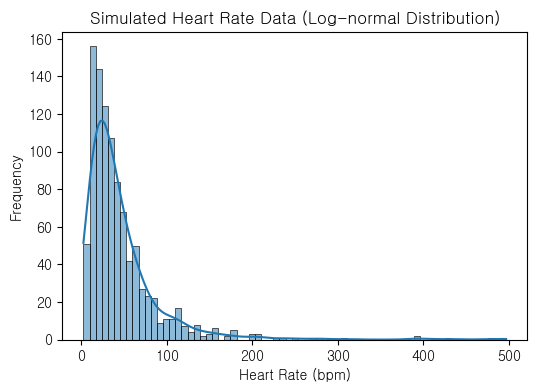

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import lognorm

mean, sigma = 3.5, 0.8  # 예시 매개변수
sample_size = 1000
simulated_heart_rates = lognorm(s=sigma, scale=np.exp(mean)).rvs(sample_size)

plt.figure(figsize=(6, 4))
sns.histplot(simulated_heart_rates, kde=True)
plt.title('Simulated Heart Rate Data (Log-normal Distribution)')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.show()


# pdf를 이용한 분포 적합

In [2]:
import pandas as pd
tj = pd.read_csv('../data/heart_rate_tj.csv')

## 태준

norm: KS Statistic = 0.1265, p-value = 0.0000
lognorm: KS Statistic = 0.0577, p-value = 0.0000
expon: KS Statistic = 0.2439, p-value = 0.0000
gamma: KS Statistic = 0.0767, p-value = 0.0000


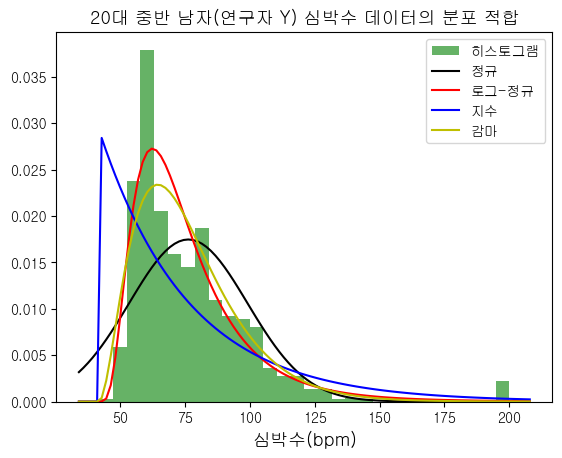

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, poisson
import seaborn as sns
from scipy.stats import kstest

# 각 분포에 대한 매개변수를 적합시킵니다.
params_norm = norm.fit(tj['heart_rate'])
params_lognorm = lognorm.fit(tj['heart_rate'])
params_expon = expon.fit(tj['heart_rate'])
params_gamma = gamma.fit(tj['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(tj['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(tj['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

plt.title('20대 중반 남자(연구자 Y) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

norm: KS Statistic = 0.1265, p-value = 0.0000
lognorm: KS Statistic = 0.0577, p-value = 0.0000


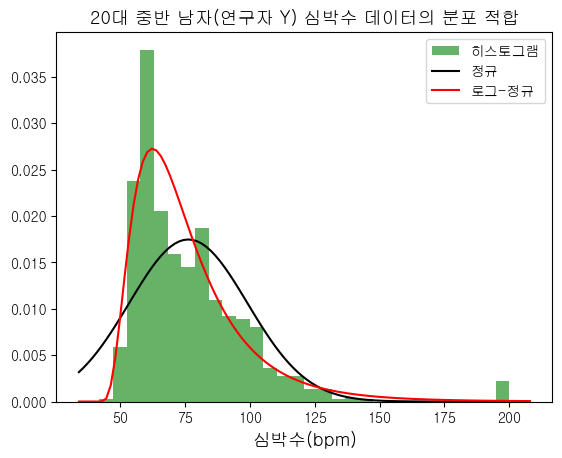

In [46]:
# 정규 분포
params_norm = norm.fit(tj['heart_rate'])

# 로그-정규 분포
params_lognorm = lognorm.fit(tj['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(tj['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(tj['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

plt.title('20대 중반 남자(연구자 Y) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.savefig('태준 심박.png', dpi=300)

## 다은

In [30]:
dy = pd.read_csv('../data/heart_rate_dy.csv', encoding='cp949')

norm: KS Statistic = 0.1000, p-value = 0.0000
lognorm: KS Statistic = 0.0493, p-value = 0.0000
expon: KS Statistic = 0.3721, p-value = 0.0000
gamma: KS Statistic = 0.9862, p-value = 0.0000


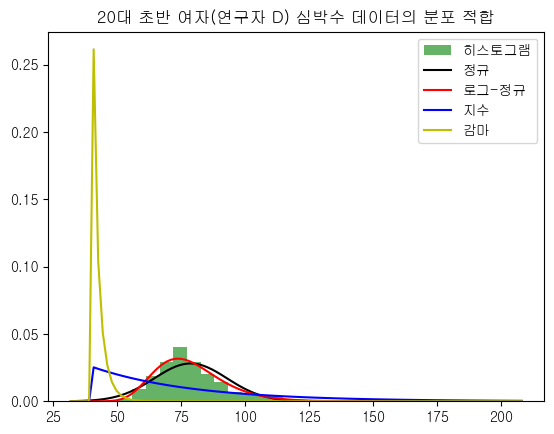

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, poisson
import seaborn as sns
from scipy.stats import kstest

# 각 분포에 대한 매개변수를 적합시킵니다.
params_norm = norm.fit(dy['heart_rate'])
params_lognorm = lognorm.fit(dy['heart_rate'])
params_expon = expon.fit(dy['heart_rate'])
params_gamma = gamma.fit(dy['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(dy['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(dy['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(dy['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(dy['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(dy['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(dy['heart_rate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

plt.title('20대 초반 여자(연구자 D) 심박수 데이터의 분포 적합')
plt.legend()
plt.show()

norm: KS Statistic = 0.1000, p-value = 0.0000
lognorm: KS Statistic = 0.0493, p-value = 0.0000


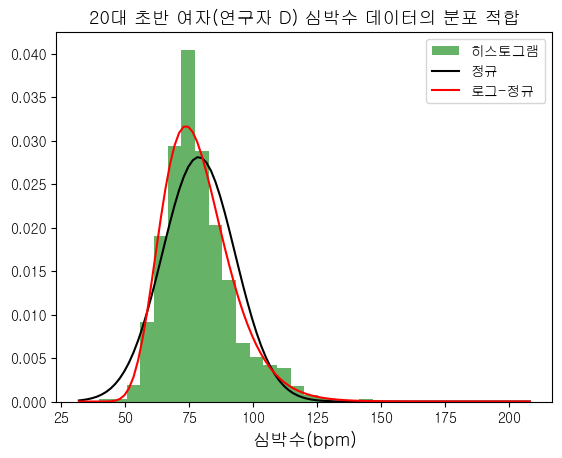

In [47]:
# 각 분포에 대한 매개변수를 적합시킵니다.
params_norm = norm.fit(dy['heart_rate'])
params_lognorm = lognorm.fit(dy['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(dy['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(dy['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(dy['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(dy['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')


plt.title('20대 초반 여자(연구자 D) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.savefig('다은 심박.png', dpi=300)

## 아영 심박

In [32]:
ay = pd.read_csv('../data/heart_rate_ay.csv', encoding='cp949')

norm: KS Statistic = 0.1000, p-value = 0.0000
lognorm: KS Statistic = 0.0493, p-value = 0.0000
expon: KS Statistic = 0.3721, p-value = 0.0000
gamma: KS Statistic = 0.9862, p-value = 0.0000


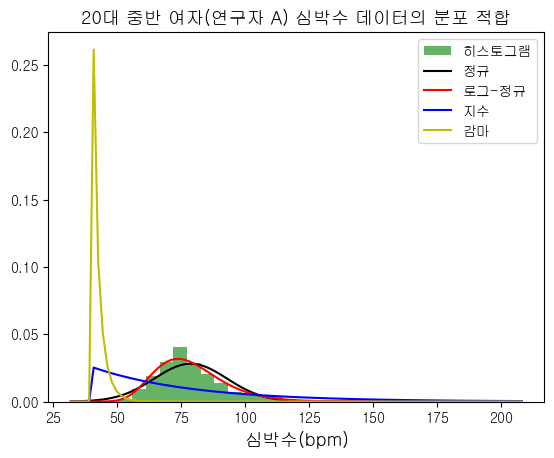

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, poisson
import seaborn as sns
from scipy.stats import kstest

# 각 분포에 대한 매개변수를 적합시킵니다.
params_norm = norm.fit(ay['heart_rate'])
params_lognorm = lognorm.fit(ay['heart_rate'])
params_expon = expon.fit(ay['heart_rate'])
params_gamma = gamma.fit(ay['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(ay['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(ay['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(ay['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(ay['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(ay['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(ay['heart_rate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

plt.title('20대 중반 여자(연구자 A) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

norm: KS Statistic = 0.1000, p-value = 0.0000
lognorm: KS Statistic = 0.0493, p-value = 0.0000
expon: KS Statistic = 0.3721, p-value = 0.0000
gamma: KS Statistic = 0.9862, p-value = 0.0000
weibull_min: KS Statistic = 0.0955, p-value = 0.0000


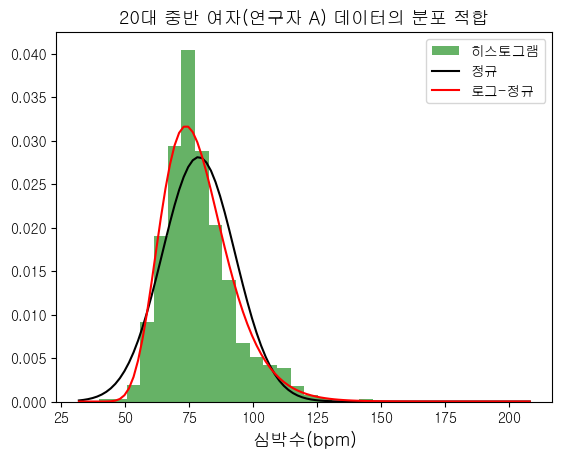

In [48]:
# Define the missing variable
params_norm = norm.fit(ay['heart_rate'])
params_lognorm = lognorm.fit(ay['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma', 'weibull_min']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(ay['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(ay['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(ay['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(ay['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')


plt.title('20대 중반 여자(연구자 A) 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.savefig('아영 심박.png', dpi=300)

## 민경

In [11]:
mk = pd.read_csv('../data/MK_heartrate.csv', encoding='cp949')

norm: KS Statistic = 0.0569, p-value = 0.0000
lognorm: KS Statistic = 0.0403, p-value = 0.0000
expon: KS Statistic = 0.3891, p-value = 0.0000
gamma: KS Statistic = 0.0394, p-value = 0.0000


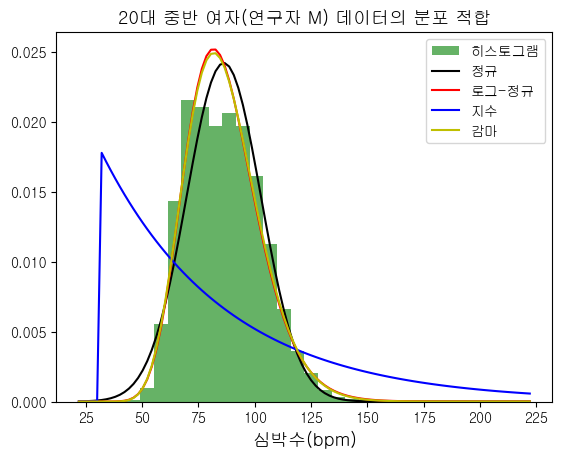

In [12]:
# Define the missing variable
params_norm = norm.fit(mk['heart_rate'])
params_lognorm = lognorm.fit(mk['heart_rate'])
params_expon = expon.fit(mk['heart_rate'])
params_gamma = gamma.fit(mk['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm', 'expon', 'gamma']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(mk['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(mk['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(mk['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(mk['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')

# 지수 분포
params_expon = expon.fit(mk['heart_rate'])
pdf_expon = expon.pdf(x, *params_expon)
plt.plot(x, pdf_expon, 'b-', label='지수')

# 감마 분포
params_gamma = gamma.fit(mk['heart_rate'])
pdf_gamma = gamma.pdf(x, *params_gamma)
plt.plot(x, pdf_gamma, 'y-', label='감마')

plt.title('20대 중반 여자(연구자 M) 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.show()

norm: KS Statistic = 0.0569, p-value = 0.0000
lognorm: KS Statistic = 0.0403, p-value = 0.0000


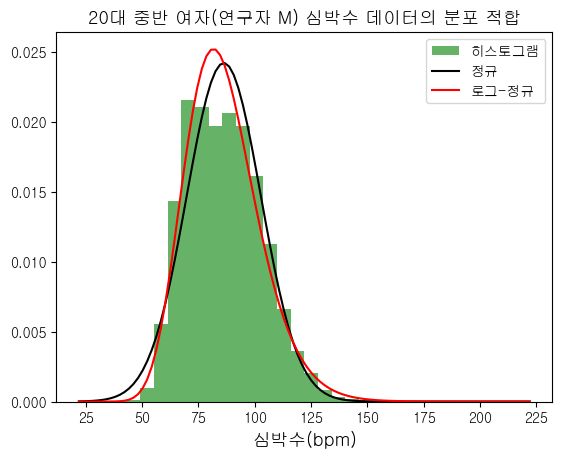

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, expon, gamma, weibull_min, poisson
import seaborn as sns
from scipy.stats import kstest

# Define the missing variable
params_norm = norm.fit(mk['heart_rate'])
params_lognorm = lognorm.fit(mk['heart_rate'])

# Perform Kolmogorov-Smirnov test for each distribution
ks_results = {}
distributions = ['norm', 'lognorm']
for distribution in distributions:
    params = eval(f'params_{distribution}')
    ks_statistic, p_value = kstest(mk['heart_rate'], distribution, args=params)
    ks_results[distribution] = {'KS Statistic': ks_statistic, 'p-value': p_value}

# Print the results
for distribution, result in ks_results.items():
    print(f'{distribution}: KS Statistic = {result["KS Statistic"]:.4f}, p-value = {result["p-value"]:.4f}')

# 데이터의 히스토그램 플롯
plt.hist(mk['heart_rate'], bins=30, density=True, alpha=0.6, color='g', label='히스토그램')

# 다른 분포를 적합시키고 PDFs 플롯
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

# 정규 분포
params_norm = norm.fit(mk['heart_rate'])
pdf_norm = norm.pdf(x, *params_norm)
plt.plot(x, pdf_norm, 'k-', label='정규')

# 로그-정규 분포
params_lognorm = lognorm.fit(mk['heart_rate'])
pdf_lognorm = lognorm.pdf(x, *params_lognorm)
plt.plot(x, pdf_lognorm, 'r-', label='로그-정규')


plt.title('20대 중반 여자(연구자 M) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.legend()
plt.savefig('민경 심박.png', dpi=300)

# cdf를 이용한 분포 적합

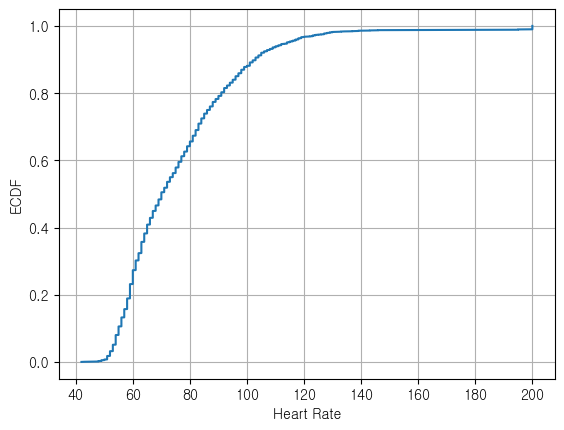

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터
data = tj['heart_rate']

# ECDF 계산
data_sorted = np.sort(data)
p = 1. * np.arange(len(data)) / (len(data) - 1)

# 그래프 그리기
plt.plot(data_sorted, p)
plt.xlabel('Heart Rate')
plt.ylabel('ECDF')
plt.grid(True)
plt.show()

## 태준

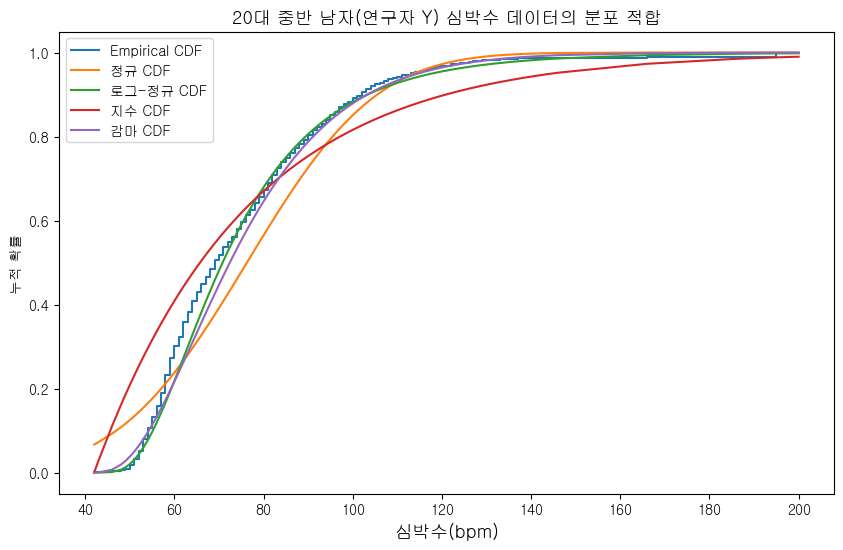

{'정규': (76.27322175732218, 22.821359977228305),
 '로그-정규': (0.5710039823013352, 40.67539787919519, 30.138379277179723),
 '지수': (42.0, 34.273221757322176),
 '감마': (2.9213261176953464, 41.85298130521733, 11.782397380419592)}

In [29]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = tj['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,
    '지수': expon,
    '감마': gamma,
    # 'exponweib': exponweib is a general form of Weibull and requires additional shape parameters
    # which can complicate the fit. Thus, it's commented out for simplicity.
    # 'exponweib': exponweib
}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 중반 남자(연구자 Y) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.show()

# Return the fitted parameters for further analysis if needed
fitted_params


{'정규': (76.27322175732218, 22.821359977228305),
 '로그-정규': (0.5710039823013352, 40.67539787919519, 30.138379277179723)}

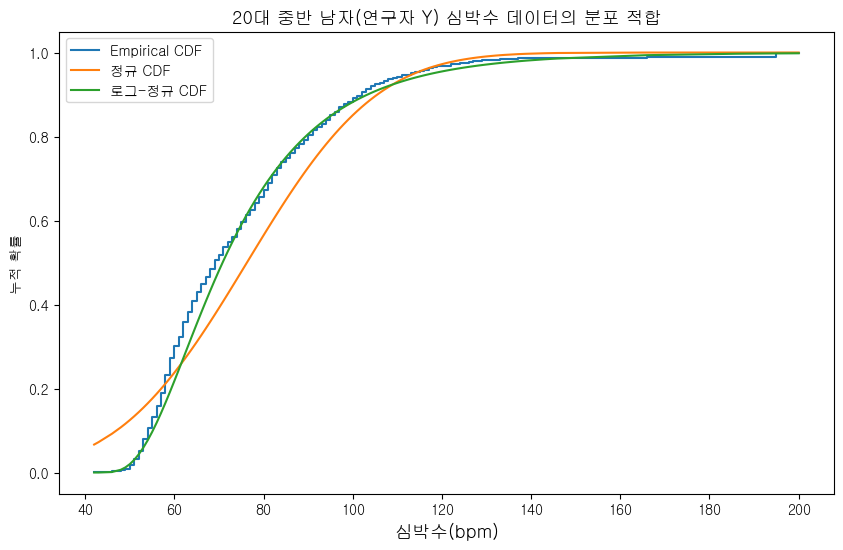

In [57]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = tj['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,
}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')


plt.title('20대 중반 남자(연구자 Y) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.savefig('../result/태준 누적 확률 심박.png', dpi=300)

# Return the fitted parameters for further analysis if needed
fitted_params


## 아영

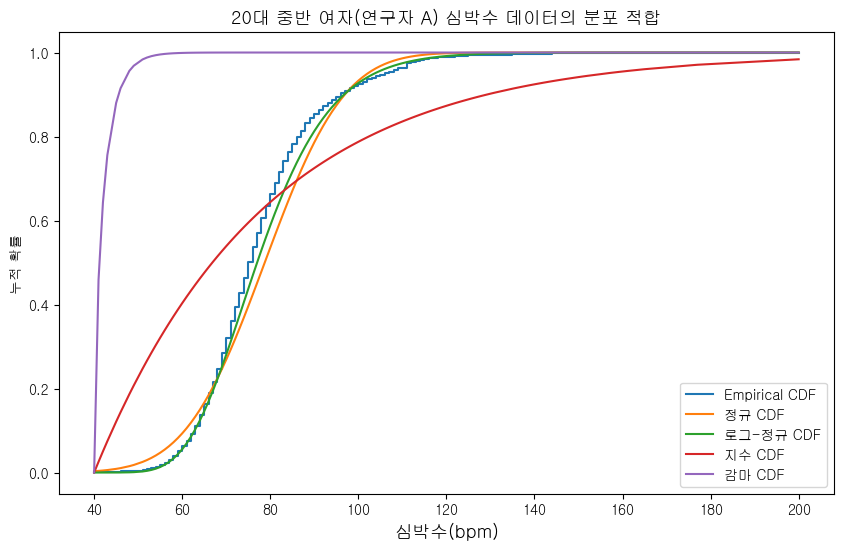

{'정규': (78.74865322456519, 14.188068956360407),
 '로그-정규': (0.2571201439774319, 26.424387867569926, 50.59410295516379),
 '지수': (40.0, 38.74865322456519),
 '감마': (0.6351411554889643, 39.99999999999999, 3.390900762842195)}

In [17]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = ay['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,
    '지수': expon,
    '감마': gamma,
    # 'exponweib': exponweib is a general form of Weibull and requires additional shape parameters
    # which can complicate the fit. Thus, it's commented out for simplicity.
    # 'exponweib': exponweib
}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 중반 여자(연구자 A) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.show()

# Return the fitted parameters for further analysis if needed
fitted_params


{'정규': (78.74865322456519, 14.188068956360407),
 '로그-정규': (0.2571201439774319, 26.424387867569926, 50.59410295516379)}

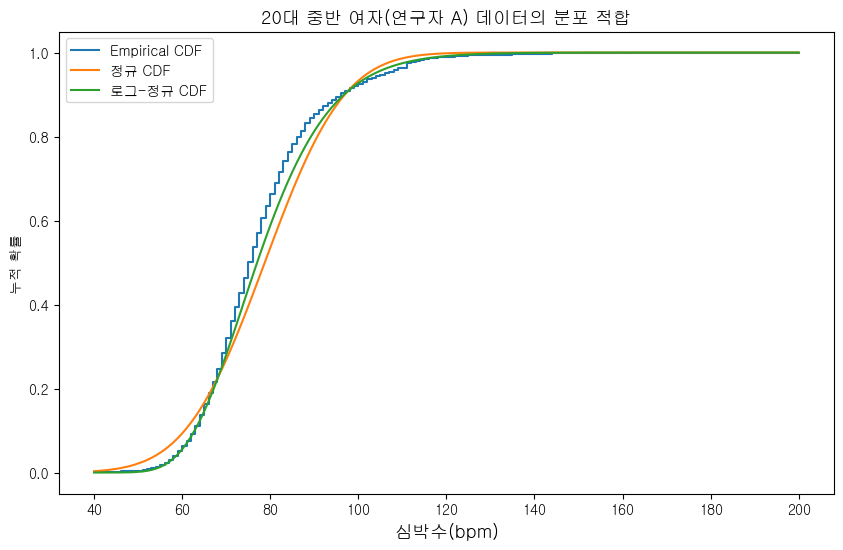

In [59]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = ay['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,

}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 중반 여자(연구자 A) 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.savefig('../result/아영 누적 확률 심박.png', dpi=300)

# Return the fitted parameters for further analysis if needed
fitted_params


## 다은

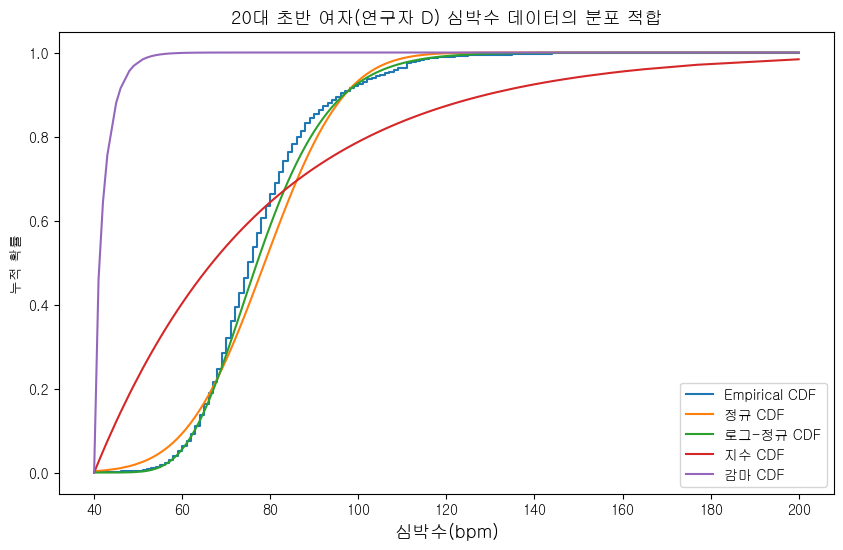

{'정규': (78.74865322456519, 14.188068956360407),
 '로그-정규': (0.2571201439774319, 26.424387867569926, 50.59410295516379),
 '지수': (40.0, 38.74865322456519),
 '감마': (0.6351411554889643, 39.99999999999999, 3.390900762842195)}

In [27]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = dy['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,
    '지수': expon,
    '감마': gamma,
    # 'exponweib': exponweib is a general form of Weibull and requires additional shape parameters
    # which can complicate the fit. Thus, it's commented out for simplicity.
    # 'exponweib': exponweib
}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 초반 여자(연구자 D) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.show()

# Return the fitted parameters for further analysis if needed
fitted_params


{'정규': (78.74865322456519, 14.188068956360407),
 '로그-정규': (0.2571201439774319, 26.424387867569926, 50.59410295516379)}

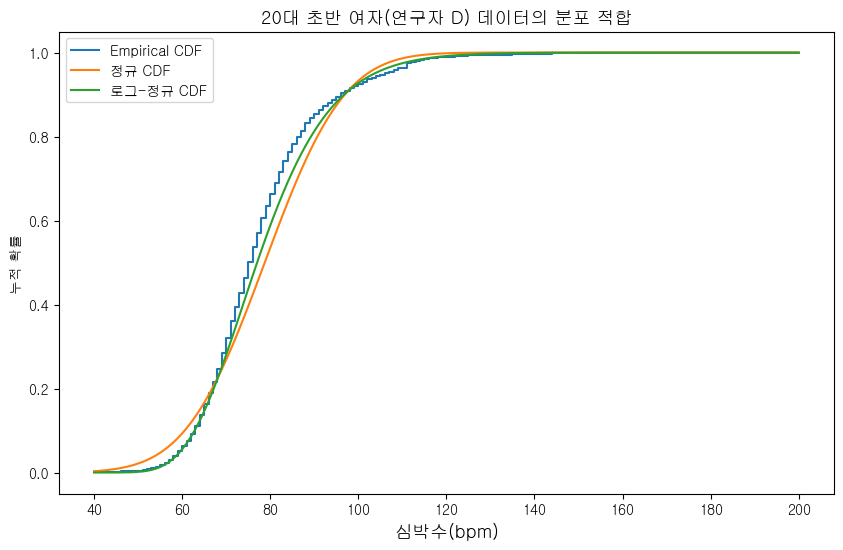

In [60]:
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = dy['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 초반 여자(연구자 D) 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.savefig('../result/다은 누적 확률 심박.png', dpi=300)

# Return the fitted parameters for further analysis if needed
fitted_params


## 민경

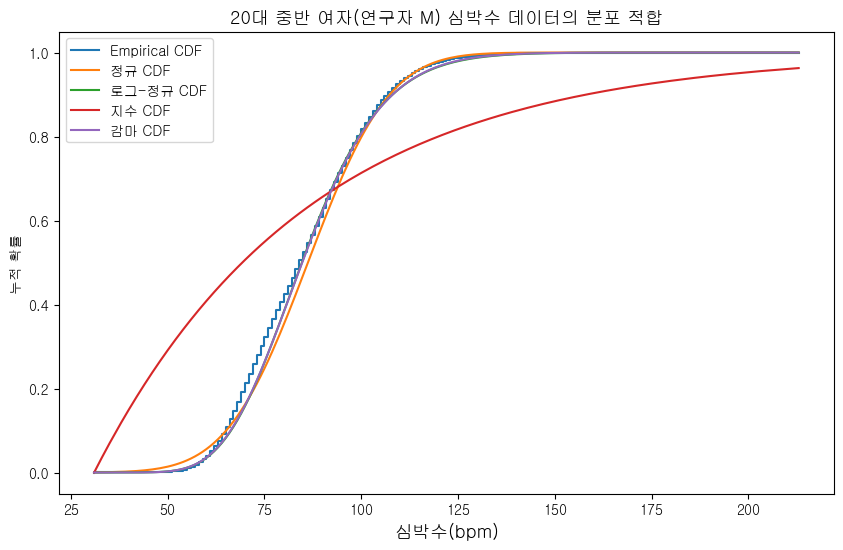

{'정규': (86.23116324180154, 16.482854291720002),
 '로그-정규': (0.1926255079941746, 0.9762973792384726, 83.69150576096004),
 '지수': (31.0, 55.23116324180154),
 '감마': (13.726970223944125, 25.054460203651047, 4.4566791028001)}

In [26]:
from scipy.stats import norm, lognorm, exponweib, expon, gamma
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = mk['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm,
    '지수': expon,
    '감마': gamma,
    # 'exponweib': exponweib is a general form of Weibull and requires additional shape parameters
    # which can complicate the fit. Thus, it's commented out for simplicity.
    # 'exponweib': exponweib
}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 중반 여자(연구자 M) 심박수 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.show()

# Return the fitted parameters for further analysis if needed
fitted_params


{'정규': (86.23116324180154, 16.482854291720002),
 '로그-정규': (0.1926255079941746, 0.9762973792384726, 83.69150576096004)}

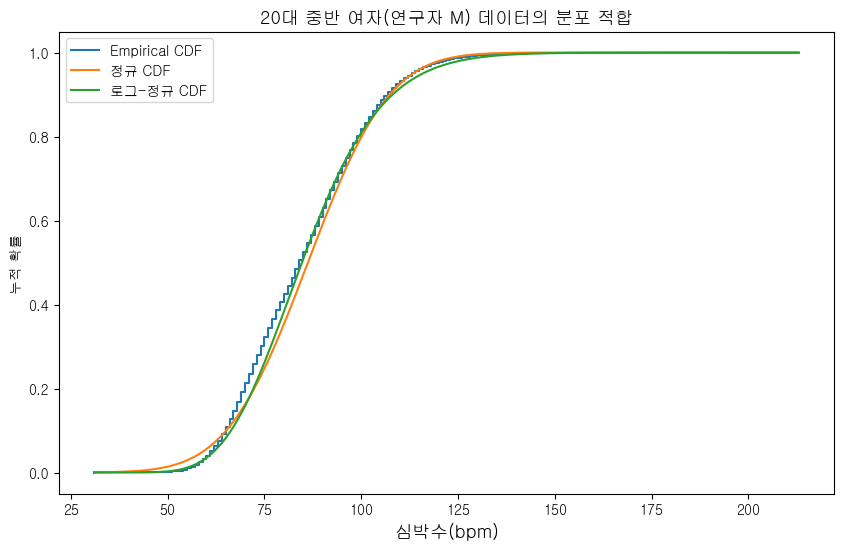

In [61]:
from statsmodels.distributions.empirical_distribution import ECDF

# Extract heart rate data
heart_rate = mk['heart_rate']

# Compute the ECDF for heart rate data
ecdf = ECDF(heart_rate)

# Generate data for the x-axis (heart rate values) using the unique sorted values
x = np.unique(heart_rate)
# Generate data for the y-axis (cumulative probability) using the ECDF
y = ecdf(x)

# We will fit these distributions to the data and compare their CDF to the ECDF
distributions = {
    '정규': norm,
    '로그-정규': lognorm

}

# Store fitted distribution parameters
fitted_params = {}

# Plot the ECDF
plt.figure(figsize=(10, 6))
plt.step(x, y, label='Empirical CDF')

# Fit distributions and plot their CDFs
for name, distribution in distributions.items():
    # Fit distribution to the data
    params = distribution.fit(heart_rate)
    fitted_params[name] = params
    
    # Generate CDF data from the fitted distribution
    cdf_fitted = distribution.cdf(x, *params)
    
    # Plot the CDF from the fitted distribution
    plt.plot(x, cdf_fitted, label=f'{name} CDF')

plt.title('20대 중반 여자(연구자 M) 데이터의 분포 적합', fontsize=13, fontweight='bold')
plt.xlabel('심박수(bpm)', fontsize=13, fontweight='bold')
plt.ylabel('누적 확률')
plt.legend()
plt.grid(False)
plt.savefig('../result/민경 누적 확률 심박.png', dpi=300)

# Return the fitted parameters for further analysis if needed
fitted_params
